    
# Working With Time Series in Pandas
    

<hr style="border:2px solid blue"> </hr>


In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries specific to this lesson
from vega_datasets import data

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [2]:
# Tossing the dataframe into a reusable variable
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
# Step one is to make sure Pandas sees date as correct dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# Next I'll make sure proper date format is understood, to ensure quicker processing
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %I:%M:%S')
df.date

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [5]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:
df = df.set_index('date').sort_index()

In [6]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [7]:
df.resample('D')

In [8]:
# Resampling dataframe by the day via 'D'
# where temp is the mean() temp for that day

daily_average = df.resample('D').mean()
daily_average.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


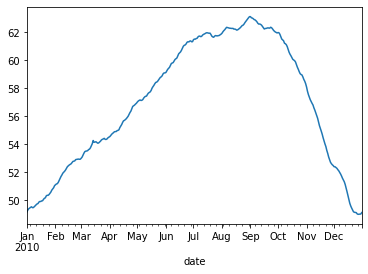

In [9]:
# Visualizing the average temperatures
daily_average.temp.plot();

### 2. Write the code necessary to visualize the minimum temperature over time.


In [10]:
daily_minimum = df.resample('D').min()
daily_minimum.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


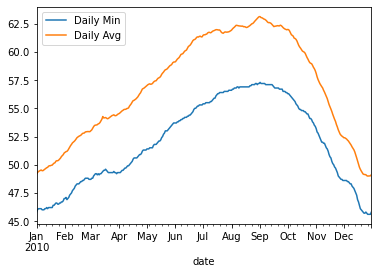

In [11]:
# Visualizing the minimum temperatures
daily_minimum.temp.plot();
daily_average.temp.plot();
plt.legend(['Daily Min', 'Daily Avg']);

### 3. Write the code necessary to visualize the maximum temperature over time.


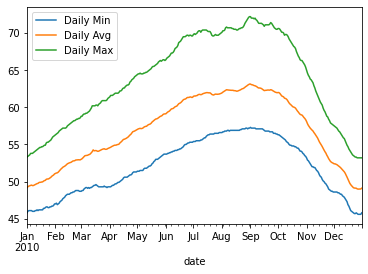

In [12]:
# Creating new max temps dataframe
daily_max = df.resample('D').max()

# Visualizing the different temperatures
daily_minimum.temp.plot();
daily_average.temp.plot();
daily_max.temp.plot();

plt.legend(['Daily Min', 'Daily Avg', 'Daily Max']);

### 4. Which month is the coldest, on average?


In [13]:
monthly_avg = df.resample('M').mean()
monthly_avg

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [14]:
# The coldest month is January
monthly_avg.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

### 5. Which month has the highest average temperature?


In [15]:
# September has the highest average temperature
monthly_avg.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [16]:
# Creating the dataframe
daily_min_max = df.resample('D').agg(['min', 'max'])
daily_min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [17]:
daily_min_max.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [18]:
# Finding the difference in temperature
# Notice that the min and max are under a multiIndex, so I have to specify 
daily_min_max['diff'] = daily_min_max[('temp', 'max')] - daily_min_max[('temp', 'min')]
daily_min_max.head()

temp       diff
             min   max     
date                       
2010-01-01  45.8  53.3  7.5
2010-01-02  46.0  53.4  7.4
2010-01-03  46.1  53.5  7.4
2010-01-04  46.1  53.6  7.5
2010-01-05  46.1  53.8  7.7

In [19]:
# Now to resample for Months instead of days, and get the average min, average max, and average difference
monthly_avg = daily_min_max.resample('M').mean()
monthly_avg

temp                  diff
                  min        max           
date                                       
2010-01-31  46.309677  54.651613   8.341935
2010-02-28  48.064286  57.550000   9.485714
2010-03-31  49.238710  60.093548  10.854839
2010-04-30  50.326667  62.646667  12.320000
2010-05-31  52.403226  65.312903  12.909677
2010-06-30  54.480000  68.430000  13.950000
2010-07-31  56.045161  70.022581  13.977419
2010-08-31  56.941935  70.812903  13.870968
2010-09-30  56.903333  71.306667  14.403333
2010-10-31  54.932258  68.364516  13.432258
2010-11-30  50.776667  61.013333  10.236667
2010-12-31  47.025806  54.951613   7.925806

In [20]:
# September has the largest temperature variance
monthly_avg['diff'].idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<hr style="border:2px solid blue"> </hr>

#### Use the dataset to answer the following questions:

In [21]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [22]:
# Checking to see if date is correct Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [23]:
df = df.set_index('date').sort_index()

### 1. Which year and month combination has the highest amount of precipitation?


In [24]:
# December! Who would have thought?
df.resample('M').sum().precipitation.sort_values().idxmax()

Timestamp('2015-12-31 00:00:00')

### 2. Visualize the amount of monthly precipitation over time.


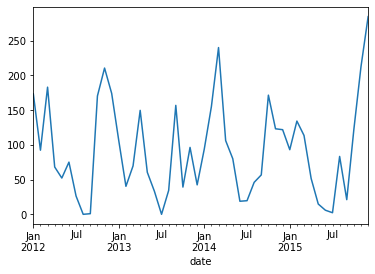

In [25]:
df.precipitation.resample('M').sum().plot();

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


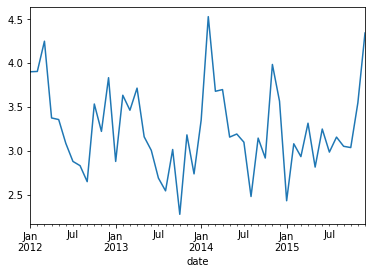

In [26]:
df.wind.resample('M').mean().plot();

### 4. Which year-month combination is the windiest?


In [27]:
# February of 2014
df.wind.resample('M').mean().sort_values().idxmax()

Timestamp('2014-02-28 00:00:00')

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [28]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [29]:
df[df.weather == 'sun'].resample('Y').mean()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-12-31,0.000000,20.234746,8.933898,3.120339
2013-12-31,0.686829,18.471220,9.158537,2.704878
2014-12-31,0.358768,18.614218,8.943602,3.157820
2015-12-31,0.127222,20.683889,10.021667,3.036111


In [30]:
# Instructor created a new column to make this work
# Sunniest year is 2014
df['is_sunny'] = df.weather == 'sun'
df.resample('Y').is_sunny.mean().idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

### 6. In which month does it rain the most?


In [31]:
df['month'] = df.index.month

In [32]:
# November has the most rain
df.groupby('month').precipitation.sum().idxmax()

11

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [33]:
df['some_rain'] = df.precipitation > 0

In [34]:
# December is always raining
df.groupby('month').some_rain.mean().idxmax()

12

<hr style="border:2px solid blue"> </hr>

#### Use the dataset to answer the following questions:

In [35]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [36]:
# Setting date to index real quick
df = data.flights_20k().set_index('date').sort_index()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


### 1. Convert any negative delays to 0.


lambda arguments : expression

In [38]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [39]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?


In [40]:
# Don't fly at 3 O'clock apparently!
df['hour'] = df.index.hour
df.groupby('hour').delay.mean().idxmax()

3

### 3. Does the day of the week make a difference in the delay amount?


In [41]:
# Don't fly on Friday's
df['day_of_week'] = df.index.day_name()
df.groupby('day_of_week').delay.mean().idxmax()

'Friday'

### 4. Does the month make a difference in the delay amount?

In [42]:
# Don't fly in February
df['month'] = df.index.month
df.groupby('month').delay.mean().idxmax()

2